<a href="https://colab.research.google.com/github/LeTranDinhTruc/AI_bt/blob/main/Adaptive_Food_Suggestion_Engine_by_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=196ff428ca5b038ad6b1b68ea93474d00f83bb3f14e9aea37e8f26fdba657407
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


7.39234114306957


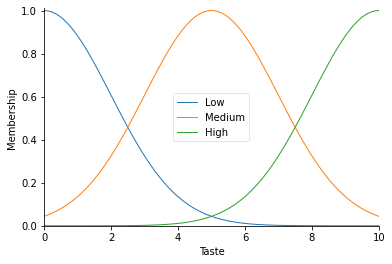

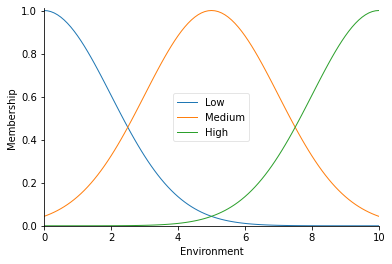

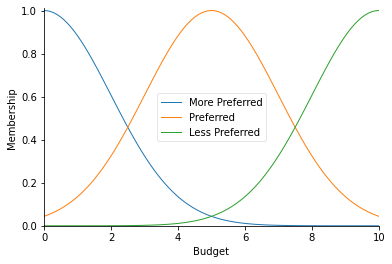

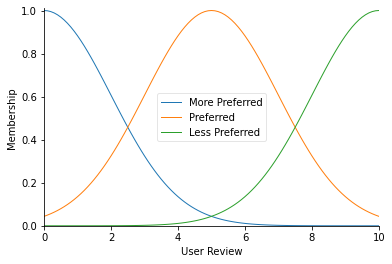

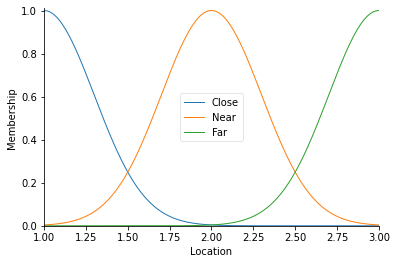

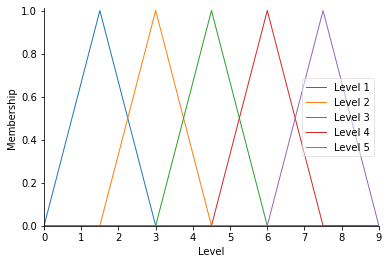

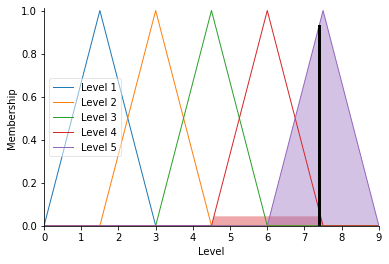

In [33]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

def rule(val1,val2,val3,val4,val5):
  #-------------------------------
  if val1 ==1:
    taste_v=taste['Low']
  elif val1==2:
    taste_v=taste['Medium']
  else: taste_v=taste['High']
  #--------------------------------
  if val2 ==1:
    environment_v=environment['Low']
  elif val2==2:
    environment_v=environment['Medium']
  else: environment_v=environment['High']
  #------------------------------------
  if val3 ==1:
    budget_v=budget['Less Preferred']
  elif val3==2:
    budget_v=budget['Preferred']
  else: budget_v=budget['More Preferred']
  #--------------------------------------
  if val4 ==1:
    userReview_v=userReview['Less Preferred']
  elif val4==2:
    userReview_v=userReview['Preferred']
  else: userReview_v=userReview['More Preferred']
  #-----------------------------------------------
  if val5 ==1:
    location_v=location['Far']
  elif val5==2:
    location_v=location['Near']
  else: location_v=location['Close']
  #---------------------------------------------------
  if 0<=val1+val2+val3+val4+val5<=3:
    level_v=level['Level 1']
  elif 3<val1+val2+val3+val4+val5<=6:
    level_v=level['Level 2']
  elif 6<val1+val2+val3+val4+val5<=9:
    level_v=level['Level 3']
  elif 9<val1+val2+val3+val4+val5<=12:
    level_v=level['Level 4']
  else:
    level_v=level['Level 5']
   #---------------------------------------------------
  rule=ctrl.Rule(taste_v & environment_v & budget_v & userReview_v & location_v,level_v)
  return rule

taste =ctrl.Antecedent(np.arange(0,10.1,0.1),'Taste')
environment=ctrl.Antecedent(np.arange(0,10.1,0.1),'Environment')   
budget=ctrl.Antecedent(np.arange(0,10.1,0.1),'Budget')
userReview=ctrl.Antecedent(np.arange(0,10.1,0.1),'User Review')
location=ctrl.Antecedent(np.arange(1,3.01,0.01),'Location')

level=ctrl.Consequent(np.arange(0,9.1,0.1),'Level') 

taste['Low']=fuzz.gaussmf(taste.universe,0,2)
taste['Medium']=fuzz.gaussmf(taste.universe,5,2)
taste['High']=fuzz.gaussmf(taste.universe,10,2)

environment['Low']=fuzz.gaussmf(environment.universe,0,2)
environment['Medium']=fuzz.gaussmf(environment.universe,5,2)
environment['High']=fuzz.gaussmf(environment.universe,10,2)

budget['More Preferred']=fuzz.gaussmf(budget.universe,0,2)
budget['Preferred']=fuzz.gaussmf(budget.universe,5,2)
budget['Less Preferred']=fuzz.gaussmf(budget.universe,10,2)

userReview['More Preferred']=fuzz.gaussmf(userReview.universe,0,2)
userReview['Preferred']=fuzz.gaussmf(userReview.universe,5,2)
userReview['Less Preferred']=fuzz.gaussmf(userReview.universe,10,2)

location['Close']=fuzz.gaussmf(location.universe,1,0.3)
location['Near']=fuzz.gaussmf(location.universe,2,0.3)
location['Far']=fuzz.gaussmf(location.universe,3,0.3)

level['Level 1']=fuzz.trimf(level.universe,[0,1.5,3])
level['Level 2']=fuzz.trimf(level.universe,[1.5,3,4.5])
level['Level 3']=fuzz.trimf(level.universe,[3,4.5,6])
level['Level 4']=fuzz.trimf(level.universe,[4.5,6,7.5])
level['Level 5']=fuzz.trimf(level.universe,[6,7.5,9])

taste.view()
environment.view()
budget.view()
userReview.view()
location.view()
level.view()

rule_array=[]
for val1 in range(1,4):
  for val2 in range(1,4):
    for val3 in range(1,4):
      for val4 in range(1,4):
        for val5 in range(1,4):
          rule_array=np.append(rule_array,rule(val1,val2,val3,val4,val5))
leveling_ctrl=ctrl.ControlSystem(rule_array)
leveling=ctrl.ControlSystemSimulation(leveling_ctrl)
leveling.input['Taste']=10
leveling.input['Environment']=10
leveling.input['Budget']=0
leveling.input['User Review']=10
leveling.input['Location']=1
leveling.compute()
print(leveling.output['Level'])
level.view(sim=leveling)